In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
date_parser_fn = lambda dates: pd.datetime.strptime(dates,'%Y-%m')

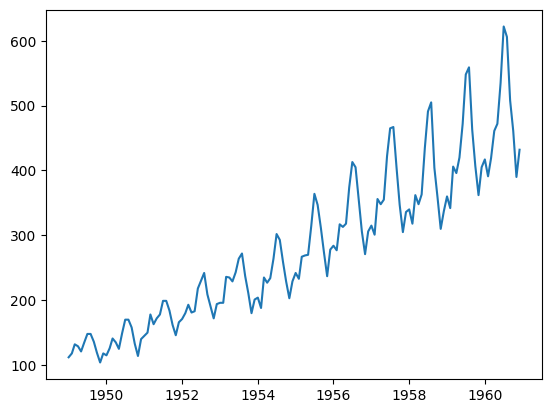

In [2]:
data = pd.read_csv("./data/AirPassengers.csv", parse_dates =['Month'], index_col = 'Month')
plt.plot(data)
plt.show()

In [4]:
indian_gdp_data = pd.read_csv('./data/GDPIndia.csv', header=0)
date_range = pd.date_range(start='1/1/1960', end='31/12/2017',freq='A')
indian_gdp_data ['TimeIndex'] = pd.DataFrame(date_range,columns=['Year'])
indian_gdp_data.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.284764,84.426437,88.914919,100.048592,114.315161
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


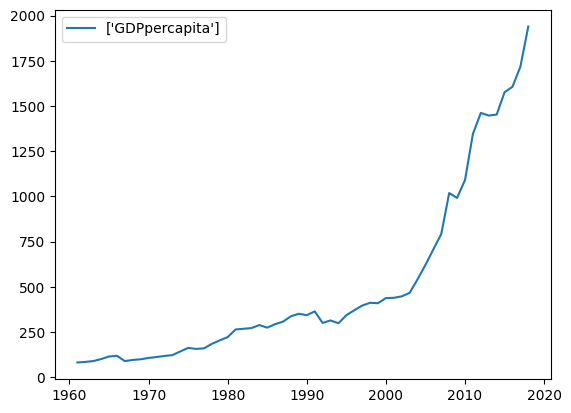

In [5]:
plt.plot(indian_gdp_data.TimeIndex, indian_gdp_data.GDPpercapita, label=['GDPpercapita'])
plt.legend(loc='best')
plt.show()

In [6]:
import pickle
IndiaGDP = indian_gdp_data
with open('gdp_india.obj', 'wb') as fp:
     pickle.dump(IndiaGDP, fp)
### Retrieve the pickle object
with open('./data/gdp_india.obj', 'rb') as fp:
    indian_gdp_data1 = pickle.load(fp)
indian_gdp_data1.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.284764,84.426437,88.914919,100.048592,114.315161
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


In [ ]:
### Saving the TS object as csv
data.to_csv('./data/ts_data.csv', index = True, sep = ',')
### Check the obj stored
data1 = pd.read_csv('./data/ts_data.csv')
### Check
data1.head(2)

In [ ]:
data = pd.read_csv('./data/daily-min-temperatures.csv',
header = 0, index_col = 0, parse_dates = True)
print(data.head())

In [ ]:
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Min temp in Southern Hemisphere From 1981 to 1990')
plt.show()

In [ ]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
data1 = pd.read_csv('./data/raw.csv', )
data1

In [ ]:
parse(parse_dates)

In [ ]:
data1.drop('No', axis=1, inplace=True)

In [ ]:
data1.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
data1.index.name = 'date'

In [ ]:
data1['pollution'].fillna(0, inplace=True)

In [ ]:
data1 = data1[24:]

In [ ]:
print(data1.head(5))

In [ ]:
vals = data1.values
# specify columns to plot
group_list = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in group_list:
    plt.subplot(len(group_list), 1, i)
    plt.plot(vals[:, group])
    plt.title(data1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [ ]:
def parsing_fn(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
data = pd.read_csv('./data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser= parsing_fn)

In [ ]:
data.plot()
plt.show()

In [ ]:
data = pd.read_csv('./data/daily-min-temperatures.csv',header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [ ]:
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Min temp in Southern Hemisphere from 1981 to 1990')
plt.show()

In [ ]:
month_df = pd.DataFrame()
one_year_ser = data['1990']
grouped_df = one_year_ser.groupby(pd.Grouper(freq='M'))
month_df = pd.concat([pd.DataFrame(x[1].values) for x in grouped_df], axis=1)
month_df = pd.DataFrame(month_df)
month_df.columns = range(1,13)
month_df.boxplot()
plt.show()

In [ ]:
grouped_ser = data.groupby(pd.Grouper(freq='A'))
year_df = pd.DataFrame()
for name, group in grouped_ser:
    year_df[name.year] = group.values
year_df.boxplot()
plt.show()

In [ ]:
tractor_sales_data = pd.read_csv("./data/tractor_salesSales.csv")
tractor_sales_data.head(5)

In [ ]:
date_ser = pd.date_range(start='2003-01-01', freq='MS',periods=len(tractor_sales_data))

In [ ]:
tractor_sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
tractor_sales_data.set_index(date_ser, inplace=True)
tractor_sales_data = tractor_sales_data[['Tractor-Sales']]
tractor_sales_data.head(5)

In [ ]:
tractor_sales_data.plot()
plt.ylabel('Tractor Sales')
plt.title("Tractor Sales from 2003 to 2014")
plt.show()

In [ ]:
month_df = pd.DataFrame()
one_year_ser = tractor_sales_data['2011']
grouped_ser = one_year_ser.groupby(pd.Grouper(freq='M'))
month_df = pd.concat([pd.DataFrame(x[1].values) for x in
grouped_ser], axis=1)
month_df = pd.DataFrame(month_df)
month_df.columns = range(1,13)
month_df.boxplot()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [ ]:
turn_over_data = pd.read_csv('./data/RetailTurnover.csv')
date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')
turn_over_data['TimeIndex'] = pd.DataFrame(date_range,columns=['Quarter'])

In [ ]:
plt.plot(turn_over_data.TimeIndex, turn_over_data.Turnover)
plt.legend(loc='best')
plt.show()

In [ ]:
decomp_turn_over = sm.tsa.seasonal_decompose(turn_over_data.Turnover, model="additive", freq=4)
decomp_turn_over.plot()
plt.show()

In [ ]:
trend = decomp_turn_over.trend
seasonal = decomp_turn_over.seasonal
residual = decomp_turn_over.resid

In [ ]:
air_passengers_data = pd.read_csv('./data/AirPax.csv')

In [ ]:
date_range = pd.date_range(start='1/1/1949', end='31/12/1960',freq='M')
air_passengers_data ['TimeIndex'] = pd.DataFrame(date_range,columns=['Month'])
print(air_passengers_data.head())

In [ ]:
decomp_air_passengers_data = sm.tsa.seasonal_decompose(air_passengers_data.Passenger, model="multiplicative", freq=12)
decomp_air_passengers_data.plot()
plt.show()

In [ ]:
Seasonal_comp = decomp_air_passengers_data.seasonal
Seasonal_comp.head(4)

In [ ]:
turn_over_data = pd.read_csv('./data/RetailTurnover.csv')
date_range = pd.date_range(start='1/7/1982', end='31/3/1992',freq='Q')
turn_over_data['TimeIndex'] = pd.DataFrame(date_range,columns=['Quarter'])

In [ ]:
quarterly_turn_over_data = pd.pivot_table(turn_over_data,values = "Turnover", columns = "Quarter", index = "Year")
quarterly_turn_over_data

In [ ]:
quarterly_turn_over_data.plot()
plt.show()

In [ ]:
quarterly_turn_over_data.boxplot()
plt.show()